In [10]:
np.savez('Czz2',Bx,By,Bz,res_magnetic_moment_up)

In [15]:
%matplotlib qt

# Magnetic moment and Energy calculator

Caculates the magnetic moment and energy table used in the LiHoF_4 simulation.
Includes procedures to:
* plot slices of the functions
* fit polynomials to the functions (turned out to be a dead end)

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy import optimize
import math
import pandas as pd
import sys
import os

In [2]:
#constants
hbar=1
J=8
deg_J = 2 * J + 1
u_B=0.6717
g_L=5/4

In [3]:
# J matrices
jplus = hbar * np.diag(np.array( [ math.sqrt(J*(J+1) - m*(m+1)) for m in np.arange(-J,J) ] ), 1)
jminus = hbar * np.diag(np.array( [ math.sqrt(J*(J+1) - m*(m-1)) for m in np.arange(-J+1,J+1) ] ),-1)
jx = (jplus + jminus) * 0.5
jy = (jplus - jminus) * (-0.5j)
jz = hbar * np.diag(np.arange(-J,J+1))
I_J = np.diag(np.ones(int(round(deg_J))))


# crystal field equivalent operators
O02 = 3 * LA.matrix_power(jz,2) - J*(J+1)*I_J
O04 = 35 * LA.matrix_power(jz,4) - 30 * J * (J+1) * LA.matrix_power(jz,2) + 25*LA.matrix_power(jz,2) - 6 * J * (J+1) * I_J + 3 * J**2 * (J+1)**2 * I_J
O44C = 0.5 * (LA.matrix_power(jplus,4) + LA.matrix_power(jminus,4))
O06 = 231 * LA.matrix_power(jz,6) - 315*J*(J+1)*LA.matrix_power(jz,4) + 735*LA.matrix_power(jz,4) + 105 * J**2 * (J+1)**2 * LA.matrix_power(jz,2) - 525*J*(J+1)*LA.matrix_power(jz,2) + 294*LA.matrix_power(jz,2) - 5 * J**3 * (J+1)**3 * I_J + 40 * J**2 *(J+1)**2 * I_J - 60*J*(J+1)*I_J
O46C1 = 0.25 * (LA.matrix_power(jplus,4) + LA.matrix_power(jminus,4)) @ (11*LA.matrix_power(jz,2) - J*(J+1)*I_J - 38*I_J)
O46S1 = -0.25j * (LA.matrix_power(jplus,4) - LA.matrix_power(jminus,4)) @ (11 * LA.matrix_power(jz,2) - J*(J+1)*I_J - 38*I_J)
O46C = O46C1 + np.transpose(np.conj(O46C1))
O46S = O46S1 + np.transpose(np.conj(O46S1))


# crystal field parameters
B02 = -0.696
B04 = 4.06e-3
B06 =  4.64e-6
B44C = 0.0418
B46C = 8.12e-4
B46S = 1.137e-4


# crystal field Hamiltonian
H_cf = B02*O02 + B04*O04 + B06*O06 + B44C*O44C + B46C*O46C + B46S*O46S

In [7]:
# linear spacing for B:
Bx = np.linspace(-1.,1.,num=10)
By = np.linspace(-1.,1.,num=10)
Bz = np.linspace(-1.5,1.5,num=10)

# alternatively, geometric spacing for B:
# (This way Bs are denser closer to 0)
"""
meanBx=0.0
maxBx=3.0       # the real max is one less than this
maxBz=3.0       # the real max is one less than this
number=40       # the real number is twice this
Bx = np.geomspace(1,maxBx,num=number) - 1 + np.geomspace(1,maxBx,num=number)[1] - np.geomspace(1,maxBx,num=number)[0]
Bx = np.concatenate((np.flip(-1*Bx),Bx),axis=0)
Bx += meanBx
By = np.geomspace(1,maxBx,num=number) - 1 + np.geomspace(1,maxBx,num=number)[1] - np.geomspace(1,maxBx,num=number)[0]
By = np.concatenate((np.flip(-1*By),By),axis=0)
Bz = np.geomspace(1,maxBz,num=number) - 1 + np.geomspace(1,maxBz,num=number)[1] - np.geomspace(1,maxBz,num=number)[0]
Bz = np.concatenate((np.flip(-1*Bz),Bz),axis=0)
"""
meanBx=0.0
maxBx=6.0       # the real max is one less than this
maxBz=3.0       # the real max is one less than this
number=40       # the real number is twice this
min_bz=0.014
# min_bz=0.00154719
# next:
#min_bz=0.00967
Bx = np.geomspace(1,maxBx,num=number) - 1 + np.geomspace(1,maxBx,num=number)[1]- np.geomspace(1,maxBx,num=number)[0]
Bx = np.concatenate((np.flip(-1*Bx),Bx),axis=0)
# Bx = np.concatenate((np.flip(-1*Bx),Bx),axis=0)
Bx += meanBx
By = np.geomspace(1,maxBx,num=number) - 1 + np.geomspace(1,maxBx,num=number)[1] - np.geomspace(1,maxBx,num=number)[0]
By = np.concatenate((np.flip(-1*By),By),axis=0)
# By = np.concatenate((np.flip(-1*By),By),axis=0)
# Bz = np.geomspace(1,maxBz,num=number) - 1 + np.geomspace(1,maxBz,num=number)[1] - np.geomspace(1,maxBz,num=number)[0]
Bz = np.geomspace(1,maxBz,num=number) - 1 + min_bz
Bz = np.concatenate((np.flip(-1*Bz),Bz),axis=0)
# Bz = np.concatenate((np.flip(-1*Bz),Bz),axis=0)

In [6]:
# linear spacing for B:
meanBx=0.0
Bx = meanBx + np.linspace(-2.,2.,num=81)
# Bx = np.concatenate(([Bx[0]-1.],Bx,[Bx[-1]+1.]))
By = np.linspace(-2.,2.,num=81)
# By = np.concatenate(([By[0]-1.],By,[By[-1]+1.]))

Bz = np.linspace(-2.,2.,num=81)
# Bz = np.concatenate(([Bz[0]-1.],Bz,[Bz[-1]+1.]))
# Bz = np.array([-2.,2.])

In [13]:
# Create full standard table
res_energy_up=[]
res_energy_down=[]
res_magnetic_moment_up=[]
res_magnetic_moment_down=[]
for i, bz in enumerate(Bz):
    res_energy_y_up=[]
    res_energy_y_down=[]
    res_magnetic_moment_y_up=[]
    res_magnetic_moment_y_down=[]
    for by in By:
        res_energy_x_up=[]
        res_energy_x_down=[]
        res_magnetic_moment_x_up=[]
        res_magnetic_moment_x_down=[]
        for bx in Bx:
            H_zeeman = u_B*g_L*(bx*jx + by*jy + bz*jz)    # zeeman term
            H = H_cf - H_zeeman                 # full hamiltonian
            w,v = LA.eigh(H)

            # initially assume lower level is up and upper is down
            energy_up = w[0]
            energy_down = w[1]
            magnetic_moment_up = np.real(np.diagonal(np.conj(v.T)@jz@v)[0])
            magnetic_moment_down = np.real(np.diagonal(np.conj(v.T)@jz@v)[1])
            j=0
            if np.allclose(w[j],w[j:j+2],atol=10**-15):
                # rotate
                change_of_basis_matrix_inverse=np.transpose(v.T)
                change_of_basis_matrix=LA.inv(change_of_basis_matrix_inverse)
                new_jz=change_of_basis_matrix @ jz @ change_of_basis_matrix_inverse
                j=0
                magnetic_moments = LA.eigvalsh(new_jz[j:j+2,j:j+2])
                magnetic_moment_up = np.real(magnetic_moments[0])
                magnetic_moment_down = np.real(magnetic_moments[1])
            
            if (magnetic_moment_up < magnetic_moment_down):
                    # switch moments
                    temp = magnetic_moment_up
                    magnetic_moment_up = magnetic_moment_down
                    magnetic_moment_down = temp
                    # switch energies
                    temp = energy_up
                    energy_up = energy_down
                    energy_down = temp

            res_energy_x_up.append(energy_up)
            res_energy_x_down.append(energy_down)

            res_magnetic_moment_x_up.append(magnetic_moment_up)
            res_magnetic_moment_x_down.append(magnetic_moment_down)
        res_energy_y_up.append(res_energy_x_up)
        res_energy_y_down.append(res_energy_x_down)
        res_magnetic_moment_y_up.append(res_magnetic_moment_x_up)
        res_magnetic_moment_y_down.append(res_magnetic_moment_x_down)
    res_energy_up.append(res_energy_y_up)
    res_energy_down.append(res_energy_y_down)
    res_magnetic_moment_up.append(res_magnetic_moment_y_up)
    res_magnetic_moment_down.append(res_magnetic_moment_y_down)
    print(str(100*i/Bz.size) + "%")

energy_up_arr_full = np.array(res_energy_up)
energy_down_arr_full = np.array(res_energy_down)
magnetic_moment_up_arr_full = np.array(res_magnetic_moment_up)
magnetic_moment_down_arr_full = np.array(res_magnetic_moment_down)
print("check up and down magnetic moment arrays are the same: " + str(np.allclose((-1)*(np.flip(magnetic_moment_down_arr_full, 0)), magnetic_moment_up_arr_full, atol=1e-15)))
print("check up and down energy arrays are the same: " + str(np.allclose(np.flip(energy_down_arr_full, 0), energy_up_arr_full, atol=1e-15)))

KeyboardInterrupt: 

In [9]:
energy_up_arr = energy_up_arr_full
energy_down_arr = energy_down_arr_full
magnetic_moment_up_arr = magnetic_moment_up_arr_full
magnetic_moment_down_arr = magnetic_moment_down_arr_full

In [24]:
energy_up_arr_h = energy_up_arr_full
energy_down_arr_h = energy_down_arr_full
magnetic_moment_up_arr_h = magnetic_moment_up_arr_full
magnetic_moment_down_arr_h = magnetic_moment_down_arr_full

In [9]:
# Create full table with constant moment w.r.t. B_z

res_energy_up=[]
res_energy_down=[]
res_magnetic_moment_up=[]
res_magnetic_moment_down=[]
for i, bz in enumerate(Bz):
    res_energy_y_up=[]
    res_energy_y_down=[]
    res_magnetic_moment_y_up=[]
    res_magnetic_moment_y_down=[]
    for by in By:
        res_energy_x_up=[]
        res_energy_x_down=[]
        res_magnetic_moment_x_up=[]
        res_magnetic_moment_x_down=[]
        for bx in Bx:
            H_zeeman = u_B*g_L*(bx*jx + by*jy + bz*jz)    # zeeman term
            H = H_cf - H_zeeman                 # full hamiltonian
            w,v = LA.eigh(H)
            # initially assume lower level is up and upper is down
            energy_up = w[0]
            energy_down = w[1]
            
            if bz<0:
                # switch energies
                temp = energy_up
                energy_up = energy_down
                energy_down = temp
            effective_bz = 1.1*math.sqrt(bx**2 + by**2)
            H_zeeman = u_B*g_L*(bx*jx + by*jy + effective_bz*jz)    # zeeman term
            H = H_cf - H_zeeman                 # full hamiltonian
            w,v = LA.eigh(H)
            
            # rotate
            change_of_basis_matrix_inverse=np.transpose(v.T)
            change_of_basis_matrix=LA.inv(change_of_basis_matrix_inverse)
            new_jz=change_of_basis_matrix @ jz @ change_of_basis_matrix_inverse
            if np.allclose(w[0],w[1],atol=10**-10):
                new_jz[0:2,0:2]=np.diag(LA.eigvalsh(new_jz[0:2,0:2]))
            
#             magnetic_moment_up = np.real(np.diagonal(np.conj(v.T)@jz@v)[0])
            magnetic_moment_up = new_jz[0,0]
    
            H_zeeman = u_B*g_L*(bx*jx + by*jy + -effective_bz*jz)    # zeeman term
            H = H_cf - H_zeeman                 # full hamiltonian
            w,v = LA.eigh(H)
            
            # rotate
            change_of_basis_matrix_inverse=np.transpose(v.T)
            change_of_basis_matrix=LA.inv(change_of_basis_matrix_inverse)
            new_jz=change_of_basis_matrix @ jz @ change_of_basis_matrix_inverse
            if np.allclose(w[0],w[1],atol=10**-10):
                new_jz[0:2,0:2]=np.diag(LA.eigvalsh(new_jz[0:2,0:2]))
            
#             magnetic_moment_down = np.real(np.diagonal(np.conj(v.T)@jz@v)[0])
            magnetic_moment_down = new_jz[0,0]
    
            # code to 

            if (magnetic_moment_up < magnetic_moment_down):
                    # switch moments
                    temp = magnetic_moment_up
                    magnetic_moment_up = magnetic_moment_down
                    magnetic_moment_down = temp
                    # switch energies
                    temp = energy_up
                    energy_up = energy_down
                    energy_down = temp
            
            res_energy_x_up.append(energy_up)
            res_energy_x_down.append(energy_down)

            res_magnetic_moment_x_up.append(magnetic_moment_up)
            res_magnetic_moment_x_down.append(magnetic_moment_down)
        res_energy_y_up.append(res_energy_x_up)
        res_energy_y_down.append(res_energy_x_down)
        res_magnetic_moment_y_up.append(res_magnetic_moment_x_up)
        res_magnetic_moment_y_down.append(res_magnetic_moment_x_down)
    res_energy_up.append(res_energy_y_up)
    res_energy_down.append(res_energy_y_down)
    res_magnetic_moment_up.append(res_magnetic_moment_y_up)
    res_magnetic_moment_down.append(res_magnetic_moment_y_down)
    print(str(100*i/Bz.size) + "%")

energy_up_arr = np.array(res_energy_up)
energy_down_arr = np.array(res_energy_down)
magnetic_moment_up_arr = np.array(res_magnetic_moment_up)
magnetic_moment_down_arr = np.array(res_magnetic_moment_down)
print("check up and down magnetic moment arrays are the same: " + str(np.allclose((-1)*(np.flip(magnetic_moment_down_arr, 0)), magnetic_moment_up_arr, atol=1e-15)))
print("check up and down energy arrays are the same: " + str(np.allclose(np.flip(energy_down_arr, 0), energy_up_arr, atol=1e-15)))

0.0%
1.25%
2.5%
3.75%
5.0%
6.25%
7.5%
8.75%
10.0%
11.25%
12.5%
13.75%
15.0%
16.25%
17.5%
18.75%
20.0%
21.25%
22.5%
23.75%
25.0%
26.25%
27.5%
28.75%
30.0%
31.25%
32.5%
33.75%
35.0%
36.25%
37.5%
38.75%
40.0%
41.25%
42.5%
43.75%
45.0%
46.25%
47.5%
48.75%
50.0%
51.25%
52.5%
53.75%
55.0%
56.25%
57.5%
58.75%
60.0%
61.25%
62.5%
63.75%
65.0%
66.25%
67.5%
68.75%
70.0%
71.25%
72.5%
73.75%
75.0%
76.25%
77.5%
78.75%
80.0%
81.25%
82.5%
83.75%
85.0%
86.25%
87.5%
88.75%
90.0%
91.25%
92.5%
93.75%
95.0%
96.25%
97.5%
98.75%
check up and down magnetic moment arrays are the same: True
check up and down energy arrays are the same: True


## Plot slices of magnetic moment vs. $B_z$

In [15]:
# function to create a slice of the moment & energy functions where bx, by are constants and Bz is an array
# returns exact results in format: (magnetic_moment_up_arr, magnetic_moment_down_arr, energy_up_arr, energy_down_arr)
def create_slice_exact_diag(bx, by, Bz):
    res_energy_up=[]
    res_energy_down=[]
    res_magnetic_moment_up=[]
    res_magnetic_moment_down=[]
    for i, bz in enumerate(Bz):
        H_zeeman = u_B*g_L*(bx*jx + by*jy + bz*jz)    # zeeman term
        H = H_cf - H_zeeman                 # full hamiltonian
        w,v = LA.eigh(H)
        # initially assume lower level is up and upper is down
        energy_up = w[0]
        energy_down = w[1]
        magnetic_moment_up = np.real(np.diagonal(np.conj(v.T)@jz@v)[0])
        magnetic_moment_down = np.real(np.diagonal(np.conj(v.T)@jz@v)[1])

        if (magnetic_moment_up < magnetic_moment_down):
            # switch moments
            temp = magnetic_moment_up
            magnetic_moment_up = magnetic_moment_down
            magnetic_moment_down = temp
            # switch energies
            temp = energy_up
            energy_up = energy_down
            energy_down = temp

        res_energy_up.append(energy_up)
        res_energy_down.append(energy_down)

        res_magnetic_moment_up.append(magnetic_moment_up)
        res_magnetic_moment_down.append(magnetic_moment_down)
        
        #print(str(100*i/Bz.size) + "%")

    energy_up_arr = np.array(res_energy_up)
    energy_down_arr = np.array(res_energy_down)
    magnetic_moment_up_arr = np.array(res_magnetic_moment_up)
    magnetic_moment_down_arr = np.array(res_magnetic_moment_down)
    return (magnetic_moment_up_arr, magnetic_moment_down_arr, energy_up_arr, energy_down_arr)

In [17]:
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

In [ ]:
# find the indices of the Bx and By values closest to 1.0 and 0.0
BxIndex=(np.abs(np.array(Bx) - 0.0)).argmin()
ByIndex=(np.abs(np.array(By) - 0.0)).argmin()

# plt.plot(Bx,magnetic_moment_up_arr[(np.abs(np.array(By) - 0.0)).argmin(),ByIndex,:],label='up')
# plt.show()

plt.subplot(1,2,1)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(-2.,-3.5,'Bx=%0.2f \nBy=%0.2f'%(Bx[BxIndex],By[ByIndex]), bbox=props)
plt.plot(Bz,magnetic_moment_up_arr[:,ByIndex,BxIndex],label='up',color='orange', linestyle='solid', marker='x',
     markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')
plt.plot(Bz,magnetic_moment_down_arr[:,ByIndex,BxIndex], label='down',color='tab:blue', linestyle='solid', marker='x',
     markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')

# create and plot exact magnetic moment results:
exact_x_arr=np.linspace(-2.,2.,num=801)
# format of the results is (magnetic_moment_up_arr, magnetic_moment_down_arr, energy_up_arr, energy_down_arr)
exact_res_arr=create_slice_exact_diag(Bx[BxIndex],By[ByIndex],exact_x_arr)

arrow_props=dict(facecolor='black', shrink=0.05, width=0.3, headwidth=4, headlength=2)

plt.plot(exact_x_arr,exact_res_arr[0], label='up exact', linewidth=0.8, color='tab:green')
plt.plot(exact_x_arr,exact_res_arr[1], label='down exact', linewidth=0.8, color='tab:red')

x0=0
# plt.plot(exact_x_arr, 0.5*(1+np.tanh(exact_x_arr-x0))*exact_res_arr[0] + 0.5*(1-np.tanh(exact_x_arr-x0))*exact_res_arr[1])

min_Bz_idx=np.argpartition(np.abs(Bz),2)
min_Bz_pos=Bz[min_Bz_idx[0]]
min_Bz_neg=Bz[min_Bz_idx[1]]
if min_Bz_pos < min_Bz_neg:
    temp=min_Bz_pos
    min_Bz_pos=min_Bz_neg
    min_Bz_neg=temp

plt.annotate(r"$B_z$=%5.3f T"%min_Bz_pos,xytext=(0.2,4),xy=(min_Bz_pos,magnetic_moment_up_arr[(np.abs(Bz - min_Bz_pos)).argmin(),ByIndex,BxIndex]),
            arrowprops=arrow_props)
plt.annotate(r"$B_z$=%5.3f T"%min_Bz_neg,xytext=(-0.2,4),xy=(min_Bz_neg,magnetic_moment_up_arr[(np.abs(Bz - min_Bz_neg)).argmin(),ByIndex,BxIndex]),
            arrowprops=arrow_props, horizontalalignment='right')
plt.grid()
plt.title(r'Magnetic Moment vs. $B_z$')
plt.legend(loc=1)
plt.ylabel(r'$<J_z>$')
plt.xlabel(r'$B_z$')
# plt.xlim(-1,1)
# plt.ylim(4,6)
plt.subplot(1,2,2)
plt.plot(Bz,energy_up_arr[:,ByIndex,BxIndex], label='up',color='orange', linestyle='solid', marker='x',
     markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')
plt.plot(Bz,energy_down_arr[:,ByIndex,BxIndex], label='down',color='tab:blue', linestyle='solid', marker='x',
     markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')

# plot exact energy results:
plt.plot(exact_x_arr,exact_res_arr[2], label='up exact', linewidth=0.8, color='tab:green')
plt.plot(exact_x_arr,exact_res_arr[3], label='down exact', linewidth=0.8, color='tab:red')
# plt.ylim(-247.5,-245)
# plt.xlim(-0.5,0.5)
plt.title(r'Energy vs. $B_z$')
plt.legend()
plt.ylabel('E')
plt.xlabel(r'$B_z$')

plt.tight_layout()
# plt.savefig('energy_and_magnetic_moment_vs_Bz.eps',format='eps')

plt.show()

Plots for w/o Energy that show how the constant moment value is affacted by the choice of effective Bz field

In [36]:
plt.close()

In [34]:
plt.figure(figsize=(6.5,5))

<Figure size 468x360 with 0 Axes>

<Figure size 468x360 with 0 Axes>

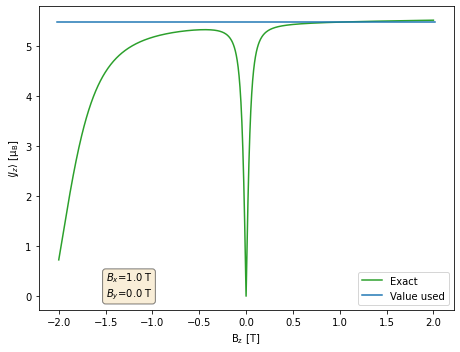

In [37]:
plt.figure(figsize=(6.5,5))

# find the indices of the Bx and By values closest to 1.0 and 0.0
# BxIndex=(np.abs(np.array(Bx) - 1.0)).argmin()
# ByIndex=(np.abs(np.array(By) - 0.0)).argmin()

# plt.plot(Bx,magnetic_moment_up_arr[(np.abs(np.array(By) - 0.0)).argmin(),ByIndex,:],label='up')
# plt.show()

# plt.subplot(1,2,1)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(-1.5,0.,'$B_x$=%0.1f T\n$B_y$=%0.1f T'%(1.0,0.0), bbox=props)
# plt.plot(Bz,magnetic_moment_up_arr[:,ByIndex,BxIndex],label='low res',color='orange', linestyle='solid', marker='x',
#      markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')
# plt.plot(Bz,magnetic_moment_up_arr_h[:,ByIndex,BxIndex],label='high res',color='blue', linestyle='solid', marker='x',
#      markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')
# plt.plot(Bz,magnetic_moment_down_arr[:,ByIndex,BxIndex], label='down',color='tab:blue', linestyle='solid', marker='x',
#      markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')

# create and plot exact magnetic moment results:
exact_x_arr=np.linspace(-2.,2.,num=801)
# format of the results is (magnetic_moment_up_arr, magnetic_moment_down_arr, energy_up_arr, energy_down_arr)
exact_res_arr=create_slice_exact_diag(1.0,0.0,exact_x_arr)

# arrow_props=dict(facecolor='black', shrink=0.05, width=0.3, headwidth=4, headlength=2)

plt.plot(exact_x_arr,exact_res_arr[0], label='Exact', color='tab:green')
# plt.plot(exact_x_arr,exact_res_arr[1], label='down exact', linewidth=0.8, color='tab:red')

# x0=0
# plt.plot(exact_x_arr, 0.5*(1+np.tanh(exact_x_arr-x0))*exact_res_arr[0] + 0.5*(1-np.tanh(exact_x_arr-x0))*exact_res_arr[1])

plt.plot(Bz,np.ones(Bz.shape)*exact_res_arr[0][(np.abs(np.array(exact_x_arr) - 1.1*Bx[BxIndex])).argmin()],label='Value used',linestyle='solid', marker=None)
# plt.plot(Bz,np.ones(Bz.shape)*exact_res_arr[0][(np.abs(np.array(exact_x_arr) - 1.0*Bx[BxIndex])).argmin()],label='const 1.0',linestyle='solid', marker=None)
# plt.plot(Bz,np.ones(Bz.shape)*exact_res_arr[0][(np.abs(np.array(exact_x_arr) - 0.6*Bx[BxIndex])).argmin()],label='const 0.6',linestyle='solid', marker=None)

min_Bz_idx=np.argpartition(np.abs(Bz),2)
min_Bz_pos=Bz[min_Bz_idx[0]]
min_Bz_neg=Bz[min_Bz_idx[1]]
if min_Bz_pos < min_Bz_neg:
    temp=min_Bz_pos
    min_Bz_pos=min_Bz_neg
    min_Bz_neg=temp

# plt.annotate(r"$B_z$=%5.3f T"%min_Bz_pos,xytext=(0.2,4),xy=(min_Bz_pos,magnetic_moment_up_arr[(np.abs(Bz - min_Bz_pos)).argmin(),ByIndex,BxIndex]),
#             arrowprops=arrow_props)
# plt.annotate(r"$B_z$=%5.3f T"%min_Bz_neg,xytext=(-0.2,4),xy=(min_Bz_neg,magnetic_moment_up_arr[(np.abs(Bz - min_Bz_neg)).argmin(),ByIndex,BxIndex]),
#             arrowprops=arrow_props, horizontalalignment='right')

# plt.annotate(r"$B_z$=%5.3f T"%min_Bz_pos,xytext=(0.2,2),xy=(min_Bz_pos,magnetic_moment_up_arr_h[(np.abs(Bz - min_Bz_pos)).argmin(),ByIndex,BxIndex]),
#             arrowprops=arrow_props)
# plt.annotate(r"$B_z$=%5.3f T"%min_Bz_neg,xytext=(-0.2,2),xy=(min_Bz_neg,magnetic_moment_up_arr_h[(np.abs(Bz - min_Bz_neg)).argmin(),ByIndex,BxIndex]),
#             arrowprops=arrow_props, horizontalalignment='right')

# plt.grid()
# plt.title(r'Magnetic Moment vs. $B_z$')
plt.legend(loc='lower right')
plt.ylabel(r'$\langle J_z \rangle$ [$\rm{\mu_B}$]')
plt.xlabel(r'$\rm{B_z}$ [T]')
# plt.xlim(-1,1)
# plt.ylim(4,6)
# plt.subplot(1,2,2)
# plt.plot(Bz,energy_up_arr[:,ByIndex,BxIndex], label='up',color='orange', linestyle='solid', marker='x',
#      markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')
# plt.plot(Bz,energy_down_arr[:,ByIndex,BxIndex], label='down',color='tab:blue', linestyle='solid', marker='x',
#      markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')

# plot exact energy results:
# plt.plot(exact_x_arr,exact_res_arr[2], label='up exact', linewidth=0.8, color='tab:green')
# plt.plot(exact_x_arr,exact_res_arr[3], label='down exact', linewidth=0.8, color='tab:red')
# plt.ylim(-247.5,-245)
# plt.xlim(-0.5,0.5)
# plt.title(r'Energy vs. $B_z$')
# plt.legend()
# plt.ylabel('E')
# plt.xlabel(r'$B_z$')

plt.tight_layout()
# plt.savefig('energy_and_magnetic_moment_vs_Bz.eps',format='eps')
plt.gcf().savefig('figures/mag_moment_vs_Bz.pdf',format='pdf')
plt.show()

In [53]:

plt.plot(Bz,np.ones(Bz.shape)*exact_res_arr[0][(np.abs(np.array(exact_x_arr) - 0.3*Bx[BxIndex])).argmin()],label='const',linestyle='solid', marker=None)
# Bz[66]

In [49]:
exact_res_arr[0].shape

(801,)

In [16]:
plt.close('all')
# find the indices of the Bx and By values closest to 1.0 and 0.0
BxIndex=(np.abs(np.array(Bx) - 3.0)).argmin()
ByIndex=(np.abs(np.array(By) - 0.0)).argmin()

# plt.plot(Bx,magnetic_moment_up_arr[(np.abs(np.array(By) - 0.0)).argmin(),ByIndex,:],label='up')
# plt.show()

# plt.subplot(1,2,1)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(-2.,-3.5,'Bx=%0.2f \nBy=%0.2f'%(Bx[BxIndex],By[ByIndex]), bbox=props)
plt.plot(Bz,magnetic_moment_up_arr_full[:,ByIndex,BxIndex],label='up',color='orange', linestyle='solid', marker='x',
     markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')
plt.plot(Bz,magnetic_moment_down_arr_full[:,ByIndex,BxIndex], label='down',color='tab:blue', linestyle='solid', marker='x',
     markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')

plt.plot(Bz,magnetic_moment_down_arr[:,ByIndex,BxIndex], label='constant down',color='cyan', linestyle='solid', marker=None)
plt.plot(Bz,magnetic_moment_up_arr[:,ByIndex,BxIndex], label='constant up',color='tab:purple', linestyle='solid')

# create and plot exact magnetic moment results:
exact_x_arr=np.linspace(-2.,2.,num=801)
# format of the results is (magnetic_moment_up_arr, magnetic_moment_down_arr, energy_up_arr, energy_down_arr)
# exact_res_arr=create_slice_exact_diag(Bx[BxIndex],By[ByIndex],exact_x_arr)
exact_res_arr=create_slice_exact_diag(3.5,By[ByIndex],exact_x_arr)

arrow_props=dict(facecolor='black', shrink=0.05, width=0.3, headwidth=4, headlength=2)

plt.plot(exact_x_arr,exact_res_arr[0], label='up exact', linewidth=0.8, color='tab:green')
plt.plot(exact_x_arr,exact_res_arr[1], label='down exact', linewidth=0.8, color='tab:red')

min_Bz_idx=np.argpartition(np.abs(Bz),2)
min_Bz_pos=Bz[min_Bz_idx[0]]
min_Bz_neg=Bz[min_Bz_idx[1]]
if min_Bz_pos < min_Bz_neg:
    temp=min_Bz_pos
    min_Bz_pos=min_Bz_neg
    min_Bz_neg=temp

plt.annotate(r"$B_z$=%5.3f T"%min_Bz_pos,xytext=(0.2,4),xy=(min_Bz_pos,magnetic_moment_up_arr_full[(np.abs(Bz - min_Bz_pos)).argmin(),ByIndex,BxIndex]),
            arrowprops=arrow_props)
plt.annotate(r"$B_z$=%5.3f T"%min_Bz_neg,xytext=(-0.2,4),xy=(min_Bz_neg,magnetic_moment_up_arr_full[(np.abs(Bz - min_Bz_neg)).argmin(),ByIndex,BxIndex]),
            arrowprops=arrow_props, horizontalalignment='right')

plt.title(r'Magnetic Moment vs. $B_z$')
plt.legend(loc=1)
plt.ylabel(r'$<J_z>$')
plt.xlabel(r'$B_z$')
# plt.xlim(-1,1)
# plt.ylim(4,6)
# plt.subplot(1,2,2)
# plt.plot(Bz,energy_up_arr[:,ByIndex,BxIndex], label='up',color='orange', linestyle='solid', marker='x',
#      markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')
# plt.plot(Bz,energy_down_arr[:,ByIndex,BxIndex], label='down',color='tab:blue', linestyle='solid', marker='x',
#      markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')

# # plot exact energy results:
# plt.plot(exact_x_arr,exact_res_arr[2], label='up exact', linewidth=0.8, color='tab:green')
# plt.plot(exact_x_arr,exact_res_arr[3], label='down exact', linewidth=0.8, color='tab:red')
# # plt.ylim(-247.5,-245)
# # plt.xlim(-0.5,0.5)
# plt.title(r'Energy vs. $B_z$')
# plt.legend()
# plt.ylabel('E')
# plt.xlabel(r'$B_z$')

plt.tight_layout()
plt.savefig(r'energy_and_magnetic_moment_vs_Bz.pdf',format='pdf')

plt.show()

In [21]:
# function to create a slice of the moment & energy functions where bx, by are constants and Bz is an array
# returns exact results in format: (magnetic_moment_up_arr, magnetic_moment_down_arr, energy_up_arr, energy_down_arr)
def create_slice_exact_Bx_diag(Bx, by, bz):
    res_energy_up=[]
    res_energy_down=[]
    res_magnetic_moment_up=[]
    res_magnetic_moment_down=[]
    for i, bx in enumerate(Bx):
        H_zeeman = u_B*g_L*(bx*jx + by*jy + bz*jz)    # zeeman term
        H = H_cf - H_zeeman                 # full hamiltonian
        w,v = LA.eigh(H)
        # initially assume lower level is up and upper is down
        energy_up = w[0]
        energy_down = w[1]
        magnetic_moment_up = np.real(np.diagonal(np.conj(v.T)@jz@v)[0])
        magnetic_moment_down = np.real(np.diagonal(np.conj(v.T)@jz@v)[1])
        if np.allclose(w[0],w[1],atol=10**-10):
                # rotate
                change_of_basis_matrix_inverse=np.transpose(v.T)
                change_of_basis_matrix=LA.inv(change_of_basis_matrix_inverse)
                new_jz=change_of_basis_matrix @ jz @ change_of_basis_matrix_inverse
                j=0
                magnetic_moments = LA.eigvalsh(new_jz[j:j+2,j:j+2])
                magnetic_moment_up = np.real(magnetic_moments[0])
                magnetic_moment_down = np.real(magnetic_moments[1])
        if (magnetic_moment_up < magnetic_moment_down):
            # switch moments
            temp = magnetic_moment_up
            magnetic_moment_up = magnetic_moment_down
            magnetic_moment_down = temp
            # switch energies
            temp = energy_up
            energy_up = energy_down
            energy_down = temp

        res_energy_up.append(energy_up)
        res_energy_down.append(energy_down)

        res_magnetic_moment_up.append(magnetic_moment_up)
        res_magnetic_moment_down.append(magnetic_moment_down)
        
        #print(str(100*i/Bz.size) + "%")

    energy_up_arr = np.array(res_energy_up)
    energy_down_arr = np.array(res_energy_down)
    magnetic_moment_up_arr = np.array(res_magnetic_moment_up)
    magnetic_moment_down_arr = np.array(res_magnetic_moment_down)
    return (magnetic_moment_up_arr, magnetic_moment_down_arr, energy_up_arr, energy_down_arr)
    """
    if np.allclose((-1)*(np.flip(magnetic_moment_down_arr, 0)), magnetic_moment_up_arr, atol=1e-15):
        return (magnetic_moment_up_arr, magnetic_moment_down_arr)
    else:
        print('error')
        #print('error! B=(%s,%s,%s) and up_moment=%s and down_moment=%s'%(bx,by,bz))
    """

In [54]:
# function to create a slice of the moment & energy functions where bx, by are constants and Bz is an array
# returns exact results in format: (magnetic_moment_up_arr, magnetic_moment_down_arr, energy_up_arr, energy_down_arr)
def create_slice_exact_Bx_diag_const(Bx, by, bz):
    res_energy_up=[]
    res_energy_down=[]
    res_magnetic_moment_up=[]
    res_magnetic_moment_down=[]
    for i, bx in enumerate(Bx):
        H_zeeman = u_B*g_L*(bx*jx + by*jy + bz*jz)    # zeeman term
        H = H_cf - H_zeeman                 # full hamiltonian
        w,v = LA.eigh(H)
        # initially assume lower level is up and upper is down
        energy_up = w[0]
        energy_down = w[1]
        if bz<0:
                # switch energies
                temp = energy_up
                energy_up = energy_down
                energy_down = temp
#         effective_bz = 1.1*max(abs(bx),abs(by))
        effective_bz = 1.1*math.sqrt(bx**2 + by**2)
        H_zeeman = u_B*g_L*(bx*jx + by*jy + effective_bz*jz)    # zeeman term
        H = H_cf - H_zeeman                 # full hamiltonian
        w,v = LA.eigh(H)

        # rotate
        change_of_basis_matrix_inverse=np.transpose(v.T)
        change_of_basis_matrix=LA.inv(change_of_basis_matrix_inverse)
        new_jz=change_of_basis_matrix @ jz @ change_of_basis_matrix_inverse
        if np.allclose(w[0],w[1],atol=10**-10):
            new_jz[0:2,0:2]=np.diag(LA.eigvalsh(new_jz[0:2,0:2]))

#             magnetic_moment_up = np.real(np.diagonal(np.conj(v.T)@jz@v)[0])
        magnetic_moment_up = new_jz[0,0]

        H_zeeman = u_B*g_L*(bx*jx + by*jy + -effective_bz*jz)    # zeeman term
        H = H_cf - H_zeeman                 # full hamiltonian
        w,v = LA.eigh(H)

        # rotate
        change_of_basis_matrix_inverse=np.transpose(v.T)
        change_of_basis_matrix=LA.inv(change_of_basis_matrix_inverse)
        new_jz=change_of_basis_matrix @ jz @ change_of_basis_matrix_inverse
        if np.allclose(w[0],w[1],atol=10**-10):
            new_jz[0:2,0:2]=np.diag(LA.eigvalsh(new_jz[0:2,0:2]))

#             magnetic_moment_down = np.real(np.diagonal(np.conj(v.T)@jz@v)[0])
        magnetic_moment_down = new_jz[0,0]
        if (magnetic_moment_up < magnetic_moment_down):
            # switch moments
            temp = magnetic_moment_up
            magnetic_moment_up = magnetic_moment_down
            magnetic_moment_down = temp
            # switch energies
            temp = energy_up
            energy_up = energy_down
            energy_down = temp

        res_energy_up.append(energy_up)
        res_energy_down.append(energy_down)

        res_magnetic_moment_up.append(magnetic_moment_up)
        res_magnetic_moment_down.append(magnetic_moment_down)
        
        #print(str(100*i/Bz.size) + "%")

    energy_up_arr = np.array(res_energy_up)
    energy_down_arr = np.array(res_energy_down)
    magnetic_moment_up_arr = np.array(res_magnetic_moment_up)
    magnetic_moment_down_arr = np.array(res_magnetic_moment_down)
    return (magnetic_moment_up_arr, magnetic_moment_down_arr, energy_up_arr, energy_down_arr)
    """
    if np.allclose((-1)*(np.flip(magnetic_moment_down_arr, 0)), magnetic_moment_up_arr, atol=1e-15):
        return (magnetic_moment_up_arr, magnetic_moment_down_arr)
    else:
        print('error')
        #print('error! B=(%s,%s,%s) and up_moment=%s and down_moment=%s'%(bx,by,bz))
    """

In [ ]:
# find the indices of the Bz and By values closest to 1.0 and 0.0
BzIndex=(np.abs(np.array(Bz) - 0.05)).argmin()
ByIndex=(np.abs(np.array(By) - 0.0)).argmin()

# plt.plot(Bx,magnetic_moment_up_arr[(np.abs(np.array(By) - 0.0)).argmin(),ByIndex,:],label='up')
# plt.show()
# plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# plt.text(-2.,-3.5,'Bz=%0.2f \nBy=%0.2f'%(Bz[BzIndex],By[ByIndex]), bbox=props)
# plt.plot(Bx,magnetic_moment_up_arr[BzIndex,ByIndex,:],label='up',color='orange', linestyle='solid', marker='x',
#      markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')
# plt.plot(Bx,magnetic_moment_down_arr[BzIndex,ByIndex,:], label='down',color='tab:blue', linestyle='solid', marker='x',
#      markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')

# create and plot exact magnetic moment results:
exact_x_arr=np.linspace(Bx[0],Bx[-1],num=801)
# format of the results is (magnetic_moment_up_arr, magnetic_moment_down_arr, energy_up_arr, energy_down_arr)
exact_res_arr=create_slice_exact_Bx_diag_const(exact_x_arr,By[ByIndex],Bz[BzIndex])

arrow_props=dict(facecolor='black', shrink=0.05, width=0.3, headwidth=4, headlength=2)
# 'tab:green'
plt.plot(exact_x_arr,exact_res_arr[0], label='up exact', linewidth=0.8, color='tab:green')
plt.plot(exact_x_arr,exact_res_arr[1], label='down exact', linewidth=0.8, color='tab:red')
# plt.annotate(r"$B_x$=0.029 T",xytext=(0.2,4),xy=(0.029,exact_res_arr[0][(np.abs(np.array(exact_x_arr) - 0.029)).argmin()]),
#             arrowprops=arrow_props)
# plt.annotate(r"$B_x$=-0.029 T",xytext=(-0.2,4),xy=(-0.029,exact_res_arr[0][(np.abs(np.array(exact_x_arr) - -0.029)).argmin()]),
#             arrowprops=arrow_props, horizontalalignment='right')

plt.title(r'Magnetic Moment vs. $B_x$')
plt.legend(loc=1)
plt.ylabel(r'$<J_z>$')
plt.xlabel(r'$B_x$')
# plt.xlim(-1,1)
# plt.ylim(4,6)
plt.subplot(1,2,2)
# plt.plot(Bx,energy_up_arr[BzIndex,ByIndex,:], label='up',color='orange', linestyle='solid', marker='x',
#      markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')
# plt.plot(Bx,energy_down_arr[BzIndex,ByIndex,:], label='down',color='tab:blue', linestyle='solid', marker='x',
#      markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')

# plot exact energy results:
plt.plot(exact_x_arr,exact_res_arr[2], label='up exact', linewidth=0.8, color='tab:green')
plt.plot(exact_x_arr,exact_res_arr[3], label='down exact', linewidth=0.8, color='tab:red')
# plt.ylim(-247.5,-245)
# plt.xlim(-0.5,0.5)
plt.title(r'Energy vs. $B_x$')
plt.legend()
plt.ylabel('E')
plt.xlabel(r'$B_x$')

plt.tight_layout()
# plt.savefig('energy_and_magnetic_moment_vs_Bx.eps',format='eps')
plt.show()

In [ ]:
# find the indices of the Bz and By values closest to 1.0 and 0.0
BzIndex=(np.abs(np.array(Bz) - 0.05)).argmin()
ByIndex=(np.abs(np.array(By) - 0.0)).argmin()

# plt.plot(Bx,magnetic_moment_up_arr[(np.abs(np.array(By) - 0.0)).argmin(),ByIndex,:],label='up')
# plt.show()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(-2.,-3.5,'Bz=%0.2f \nBy=%0.2f'%(Bz[BzIndex],By[ByIndex]), bbox=props)
plt.plot(Bx,magnetic_moment_up_arr[BzIndex,ByIndex,:],label='up',color='orange', linestyle='solid', marker='x',
     markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')
plt.plot(Bx,magnetic_moment_down_arr[BzIndex,ByIndex,:], label='down',color='tab:blue', linestyle='solid', marker='x',
     markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')

# create and plot exact magnetic moment results:
exact_x_arr=np.linspace(Bx[0],Bx[-1],num=801)
# format of the results is (magnetic_moment_up_arr, magnetic_moment_down_arr, energy_up_arr, energy_down_arr)
exact_res_arr=create_slice_exact_Bx_diag(exact_x_arr,By[ByIndex],Bz[BzIndex])

arrow_props=dict(facecolor='black', shrink=0.05, width=0.3, headwidth=4, headlength=2)

plt.plot(exact_x_arr,exact_res_arr[0], label='up exact', linewidth=0.8, color='tab:green')
plt.plot(exact_x_arr,exact_res_arr[1], label='down exact', linewidth=0.8, color='tab:red')
plt.annotate(r"$B_x$=0.029 T",xytext=(0.2,4),xy=(0.029,exact_res_arr[0][(np.abs(np.array(exact_x_arr) - 0.029)).argmin()]),
            arrowprops=arrow_props)
plt.annotate(r"$B_x$=-0.029 T",xytext=(-0.2,4),xy=(-0.029,exact_res_arr[0][(np.abs(np.array(exact_x_arr) - -0.029)).argmin()]),
            arrowprops=arrow_props, horizontalalignment='right')

plt.title(r'Magnetic Moment vs. $B_x$')
plt.legend(loc=1)
plt.ylabel(r'$<J_z>$')
plt.xlabel(r'$B_x$')
# plt.xlim(-1,1)
# plt.ylim(4,6)
plt.subplot(1,2,2)
plt.plot(Bx,energy_up_arr[BzIndex,ByIndex,:], label='up',color='orange', linestyle='solid', marker='x',
     markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')
plt.plot(Bx,energy_down_arr[BzIndex,ByIndex,:], label='down',color='tab:blue', linestyle='solid', marker='x',
     markerfacecolor='k', markeredgecolor='k', markersize=2,fillstyle='full')

# plot exact energy results:
plt.plot(exact_x_arr,exact_res_arr[2], label='up exact', linewidth=0.8, color='tab:green')
plt.plot(exact_x_arr,exact_res_arr[3], label='down exact', linewidth=0.8, color='tab:red')
# plt.ylim(-247.5,-245)
# plt.xlim(-0.5,0.5)
plt.title(r'Energy vs. $B_x$')
plt.legend()
plt.ylabel('E')
plt.xlabel(r'$B_x$')

plt.tight_layout()
# plt.savefig('energy_and_magnetic_moment_vs_Bx.eps',format='eps')
plt.show()

In [ ]:
plt.figure(figsize=(12,4))
plt.text(0.5,0.5,'test')
plt.subplot(1,2,1)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(-1.5,+2.5,'Bx=%s \nBy=%s'%(Bx[0],By[0]), bbox=props)
plt.plot(Bz,magnetic_moment_up_arr.flatten(),label='up')
plt.plot(Bz,magnetic_moment_down_arr.flatten(), label='down')
plt.title('magnetic moment vs. Bz')
plt.legend(loc=1)
plt.ylabel(r'$<J_z>$')
plt.xlabel('Bz')
plt.subplot(1,2,2)
plt.plot(Bz,energy_up_arr.flatten(), label='up')
plt.plot(Bz,energy_down_arr.flatten(), label='down')
plt.title('energy vs. Bz')
plt.ylabel('E')
plt.xlabel('Bz')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# get approximate slope of the function:
(magnetic_moment_up_arr.flatten()[-1]-magnetic_moment_up_arr.flatten()[0])/(By[-1]-By[0])

In [ ]:
print('y2=%s y1=%s x2=%s x1=%s'%(magnetic_moment_up_arr.flatten()[-1],magnetic_moment_up_arr.flatten()[0],By[-1],By[0]))

# scheme to fit a entire Bx,By,Bz data

In [ ]:
def func(R, a0, a1, a2, b0, b1, b2, c0, c1, c2, a3, b3, c3, a4, b4, c4, a5, b5, c5, a6, b6, c6, a7, b7, c7, a8, b8, c8,
        a9, b9, c9, a10, b10, c10):
    #p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15, p16, p17, p18, p19
    x, y, z = R
    x, y, z = np.meshgrid(x, y, z)
    #g = ((a0 + a1*x + a2*x**2)*
    #     (b0 + b1*y + b2*y**2)*
    #     (c0 + c1*z + c2*z**2))
    
    g = ((a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + a5*x**5 + a6*x**6 + a7*x**7 + a8*x**8 + a9*x**9 + a10*x**10)*
         (b0 + b1*y + b2*y**2 + b3*y**3 + b4*y**4 + b5*y**5 + b6*y**6 + b7*y**7 + b8*y**8 + b9*y**9 + b10*y**10)*
         (c0 + c1*z + c2*z**2 + c3*z**3 + c4*z**4 + c5*z**5 + c6*z**6 + c7*z**7 + c8*z**8 + c9*z**9 + c10*z**10))
    
    #g = (p0 + p1*x + p2*y + p3*z + p4*x*y + p5*x*z + p6*y*z + p7*x**2 + p8*y**2 +
    #     p9*z**2 + p10*x**3 + p11*y**3 + p12*z**3 + p13*x**2*y + p14*x**2*z + p15*y**2*x + p16*y**2*z
    #     + p17*z**2*x + p18*z**2*y + p19*x*y*z)
    return g.ravel()


In [ ]:
np.array([Bx,By,Bz])

In [ ]:
x_data=np.array([Bx, By, Bz]
y_data=magnetic_moment_up_arr
p0=[ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ]
params, params_covariance = optimize.curve_fit(func, x_data, y_data.ravel(), p0=p0)

print(params)
# calculate R^2
residuals = y_data.ravel() - func(x_data, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R^2 (%s)=%s'%(func.__name__,str(r_squared)))

#plt.plot(x_data, func(x_data, *params), label=func.__name__)

In [ ]:
from matplotlib.lines import Line2D

index=5
plt.figure(figsize=(10,10))
#data
h1 = plt.contour(Bx,By,y_data[index],colors='r')
#fit
h2 = plt.contour(Bx,By,func((Bx,By,Bz),*params).reshape(len(Bx),len(By),len(Bz))[index],colors='b')

custom_lines = [Line2D([0], [0], color='r', lw=2),
                Line2D([0], [0], color='b', lw=2)]

plt.gca().legend(custom_lines, ['data', 'fit'])

plt.clabel(h1, inline=1, fontsize=10)     
plt.clabel(h2, inline=1, fontsize=10)
plt.text(1.05,.95,'Bz=%1.4f'%Bz[index])
plt.xlabel('Bx')
plt.ylabel('By')
plt.gcf().savefig('fit.png')
plt.show()


# scheme to fit a single Bz layer

In [ ]:
Bz_index=14

In [ ]:
def func_quad(R, p0, p1, p2, p3, p4, p5):
    #p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15, p16, p17, p18, p19
    x, y = R
    x, y = np.meshgrid(x, y)  
    g = (p0 + p1*x + p2*y + p3*x*y + p4*x**2 + p5*y**2)
    return g.ravel()


In [ ]:
x_data=np.array([Bx, By],dtype=float)
y_data=magnetic_moment_up_arr[Bz_index]

p0=[ 5.51, 1, 1, 1, 1, 1 ]
print(func_quad(x_data,*p0).shape)
params, params_covariance = optimize.curve_fit(func_quad, x_data, y_data.ravel(), p0=p0)

print(params)
# calculate R^2
residuals = y_data.ravel() - func_quad(x_data, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R^2 (%s)=%s'%(func.__name__,str(r_squared)))

In [ ]:
from matplotlib.lines import Line2D

plt.figure(figsize=(10,10))
#data
h1 = plt.contour(Bx,By,y_data,colors='r')
#fit
h2 = plt.contour(Bx,By,func_quad((Bx,By),*params).reshape(30,30),colors='b')

custom_lines = [Line2D([0], [0], color='r', lw=2),
                Line2D([0], [0], color='b', lw=2)]

plt.gca().legend(custom_lines, ['data', 'fit'])

plt.clabel(h1, inline=1, fontsize=10)     
plt.clabel(h2, inline=1, fontsize=10)
plt.text(1.05,.95,'Bz=%1.4f'%Bz[Bz_index])
plt.show()

## Surface plot up and down

In [23]:
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(14,6))

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 1, 1, projection='3d')
ByIndex=(np.abs(np.array(By) - 0.0)).argmin()
Z0=magnetic_moment_up_arr_3[:,ByIndex,:]
Z1=magnetic_moment_up_arr[:,ByIndex,:]
X,Y=np.meshgrid(Bx,Bz)
p0 = ax.plot_surface(X, Y, Z0, color='b',
                       linewidth=0, antialiased=False)

# mynorm=p0.norm
p1 = ax.plot_surface(X, Y, Z1, color='r',
                       linewidth=0, antialiased=False)
# p1.set_norm(mynorm)

ax.view_init(15, 65)
# fig.colorbar(p0)
plt.ylabel('Bz')
plt.xlabel('Bx')
plt.show()